# SC1015 Mini-Project

Group: 2, FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H

### Final Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholesterol`: Serum cholesterol in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `resting_ecg_result`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `exercise_induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `new_st_depression`: The presence of ST depression induced by exercise relative to rest (0 = no; 1 = yes) (Categorical)
12. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
13. `ca` changed to `num_affected_vessels`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
14. `thal` changed to `defect_type`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
15. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)

### Essential Libraries

Let us begin by importing the essential Python Libraries for Data Extraction and Cleaning.

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [24]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

### Import the Dataset

We will be importing our clean_data.csv dataset that we previously saved.\
Dataset is a cleaned version of [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 


In [25]:
# Importing our dataset
clean_data = pd.read_csv("datasets\clean_data.csv")

print("Data dimensions:", clean_data.shape)

clean_data

Data dimensions: (1000, 15)


,age,sex,chest_pain,blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,new_st_depression,slope,num_affected_vessels,defect_type,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,1,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,1,1,140,221,0,1,164,1,0.0,0,2,0,2,1
996,60,1,0,125,258,0,0,141,1,2.8,1,1,1,3,0
997,47,1,0,110,275,0,0,118,1,1.0,1,1,1,2,0
998,50,0,0,110,254,0,0,159,0,0.0,0,2,0,2,1


In [26]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "resting_ecg_result", "exercise_induced_angina", "new_st_depression", 
           "slope", "num_affected_vessels", "defect_type", "heart_disease"]
num_var = [var for var in clean_data.columns if var not in cat_var]

## Assumptions of Logistic Regression

Because logistic regression does not assume normality, the model will not be affected by skew. Thus, we should not be removing outliers from our data, as this would simply be a loss of useful information.

Rather, logistic regression assumes the following:

1. Independence of Observations (which we shall assume)
2. Absence of Multicollinearity (independent variables should not be highly correlated with any other variable in the model)

We can use these assumptions to determine the relevant independent variables for our model. 

### Absence of Multicollinearity

We can test for this with VIF (Variance Inflation Factor). VIF is a measure of the amount of multicollinearity in regression analysis (Investopedia, 2023). Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. It can adversely affect regression results.

The formula for VIF is given as:

$VIF_i = \frac{1}{1 - R_i^2}$

where $R_i^2$ is the unadjusted coefficient of determination (R-squared) for regressing the $i$-th independent variable on the remaining ones. 

This makes sense, as we want to find how correlated the independent variables are with each other. An independent variable that we can reliably determine from other independent variables would have a high $R^2$ and would thus have a high $VIF$ (observe that $VIF$ and $R^2$ are linearly related). Conversely, an independent variably that we cannot reliably determine from other independent variables would have a low $R^2$ and thus a low $VIF$. We want our independent variables to not be overly correlated.

The lower the $R_i^2$ of the $i$-th independent variable, the closer the value of $VIF_i$ is to 1. The higher the $R_i^2$ of the $i$-th independent variable, the more the value of $VIF_i$ tends to infinity.

We can do a simple demonstration of finding the VIF of our independent variables below.

In [27]:
# Import LinearRegression model, add_constant and train_test_split from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a Linear Regression object
linreg = LinearRegression()

independent_vars = clean_data.drop("heart_disease", axis = 1)

for var in independent_vars.columns:
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(independent_vars.drop(var, axis = 1),
                                                    clean_data[var], test_size = 0.20, random_state = 42)
    linreg.fit(X_train, y_train)        # train the linear regression model
    
    print(var)
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("VIF \t:", 1 / (1 - linreg.score(X_train, y_train)))
    print()

age
Explained Variance (R^2) 	: 0.3330608983262606
VIF 	: 1.4993872716270744

sex
Explained Variance (R^2) 	: 0.14138802156625485
VIF 	: 1.164670450817808

chest_pain
Explained Variance (R^2) 	: 0.24655039583744875
VIF 	: 1.3272287814279047

blood_pressure
Explained Variance (R^2) 	: 0.14020962167132323
VIF 	: 1.1630741925071002

cholesterol
Explained Variance (R^2) 	: 0.12252593864193073
VIF 	: 1.1396348268714598

fasting_blood_sugar
Explained Variance (R^2) 	: 0.07960061182990452
VIF 	: 1.086484859565328

resting_ecg_result
Explained Variance (R^2) 	: 0.055663729181380295
VIF 	: 1.0589448175416654

max_heart_rate
Explained Variance (R^2) 	: 0.38617814635497283
VIF 	: 1.6291371740216656

exercise_induced_angina
Explained Variance (R^2) 	: 0.30767842834451176
VIF 	: 1.4444154868795829

st_depression
Explained Variance (R^2) 	: 0.5554149643671067
VIF 	: 2.2492884821830326

new_st_depression
Explained Variance (R^2) 	: 0.4674267384752129
VIF 	: 1.877675941028177

slope
Explained Variance

Generally, a VIF greater than 3 could be a cause for concern (Investopedia, 2023) and we should avoid using these independent variables in our model. We can further confirm our calculations with the `variance_inflation_factor` from the `statsmodels` library.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# variance_inflation_factor expects the presence of a constant in the matrix of explanatory variables
# We can add a constant column using add_constant from statsmodels
independent_vars = add_constant(independent_vars)

VIF_df = pd.DataFrame(independent_vars.columns).rename({0 : "VARIABLES"}, axis = 1) # rename variable column

VIF_df["VIF"] = [vif(independent_vars, i) for i in range(len(independent_vars.columns))]

VIF_df

,VARIABLES,VIF
0,const,214.344193
1,age,1.502013
2,sex,1.150116
3,chest_pain,1.317713
4,blood_pressure,1.185363
5,cholesterol,1.134173
6,fasting_blood_sugar,1.099112
7,resting_ecg_result,1.069972
8,max_heart_rate,1.679011
9,exercise_induced_angina,1.411558


The VIF values we calculated manually are almost the same as the ones calculated from the `statsmodel` library. It appears that all our variables have a VIF below 3, and we do not need to drop any of them. 

## Encoding

### One-Hot Encoding

Since Logistic Regression is a linear model, we will need to convert categorical variables into a set of binary (dummy) variables before fitting them in the model. We can first do this with one-hot encoding. 

### Label Encoding

While one-hot encoding can be powerful, it has several limitations. One-hot encoding is good for categorical features that are nominal, but not ordinal. Ordinal data consist of natural categories that are ordered. 

For example, a feature like `slope` with values 0-2 would have a natural degree of order, where upsloping = 0, flat = 1 and downsloping = 2. A normal st segment during exercise slopes sharply upwards (Hill & Timmis, 2002), and a flat slope would not be a good indicator, and a downward slope an even worse indicator. The classes in slope have a natural degree of order which is indicated by the value of their magnitudes.

On the other hand, a nominal feature like `sex` with values 0/1 that only indicate the gender of the patient has no natural ordering.  

Another limitation of one-hot encoding is that it increases the dimensionality and sparsity of the dataset, while label encoding does not. Furthermore, one-hot encoding could result in the "dummy variable trap", whereby one dummy variable can be used to predict the variable of others. 

For example, we have the columns `sex_0` and `sex_1` in our one-hot encoded dataset. Binary categorical variables such as these could result in high multicollinearity of our data. Given the value of `sex_0`, we could easily determine the value of `sex_1` (`sex_0` == !`sex_1`). This goes against the multicollinearity assumption of our logistic regression model.

To fix this, we could explore using label encoding for our ordinal features and one-hot encoding for our nominal features. Since one-hot encoding would induce perfect multicollinearity, we could drop one of the columns from the encoded features. 

First, let us identify which categorical variables are nominal or ordinal.

In [29]:
print(cat_var)

['sex', 'chest_pain', 'fasting_blood_sugar', 'resting_ecg_result', 'exercise_induced_angina', 'new_st_depression', 'slope', 'num_affected_vessels', 'defect_type', 'heart_disease']


`slope` and `num_affected_vessels` are the only ordinal features. 

Note that features such as `chest_pain` and `resting_ecg_result` are nominal because their values do not represent a degree of order (such as severity of condition) and only represent the different types of chest pain and ecg results.

chest_pain:

- Typicalangina = 1 
- Atypicalangina = 2 
- Non-anginal pain = 3 
- Asymptomatic = 4

resting_ecg_result: 

- Normal = 0
- Left ventricular hypertrophy = 1
- ST-T wave abnormality = 2

Because `slope` and `num_affected_vessels` are already label encoded (from 0-n), we simply exclude them when doing one-hot encoding. 

In [30]:
from sklearn.preprocessing import OneHotEncoder

# drop = "first" parameter drops the first category in each feature
ohe = OneHotEncoder(drop = "first")

# One-Hot Encoding of categorical predictors
cat_pred = clean_data[cat_var].drop(["slope", "num_affected_vessels", "heart_disease"], axis = 1)
ohe.fit(cat_pred)

cat_pred_ohe = pd.DataFrame(ohe.transform(cat_pred).toarray(), 
             columns = ohe.get_feature_names_out(cat_pred.columns))

# Check the encoded variables
cat_pred_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex_1                      1000 non-null   float64
 1   chest_pain_1               1000 non-null   float64
 2   chest_pain_2               1000 non-null   float64
 3   chest_pain_3               1000 non-null   float64
 4   fasting_blood_sugar_1      1000 non-null   float64
 5   resting_ecg_result_1       1000 non-null   float64
 6   resting_ecg_result_2       1000 non-null   float64
 7   exercise_induced_angina_1  1000 non-null   float64
 8   new_st_depression_1        1000 non-null   float64
 9   defect_type_2              1000 non-null   float64
 10  defect_type_3              1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


In [31]:
# Concatenate with the numeric variables
clean_data_encoded = pd.concat([clean_data[num_var], cat_pred_ohe, 
                            clean_data[["slope", "num_affected_vessels", "heart_disease"]]], axis = 1)

print("Dimensions:", clean_data_encoded.shape)

# Check the final DataFrame
clean_data_encoded

Dimensions: (1000, 19)


,age,blood_pressure,cholesterol,max_heart_rate,st_depression,sex_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,resting_ecg_result_1,resting_ecg_result_2,exercise_induced_angina_1,new_st_depression_1,defect_type_2,defect_type_3,slope,num_affected_vessels,heart_disease
0,52,125,212,168,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2,2,0
1,53,140,203,155,3.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,0
2,70,145,174,125,2.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0,0
3,61,148,203,161,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,1,0
4,62,138,294,106,1.9,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59,140,221,164,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2,0,1
996,60,125,258,141,2.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1,1,0
997,47,110,275,118,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,1,0
998,50,110,254,159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,1


In [32]:
# Check for VIF of independent variables again

# variance_inflation_factor expects the presence of a constant in the matrix of explanatory variables
# We can add a constant column using add_constant from statsmodels

independent_vars = add_constant(clean_data_encoded.drop("heart_disease", axis = 1))

VIF_df = pd.DataFrame(independent_vars.columns).rename({0 : "VARIABLES"}, axis = 1) # rename variable column

VIF_df["VIF"] = [vif(independent_vars, i) for i in range(len(independent_vars.columns))]

VIF_df

,VARIABLES,VIF
0,const,230.003723
1,age,1.507257
2,blood_pressure,1.231680
3,cholesterol,1.143417
4,max_heart_rate,1.703958
5,st_depression,2.276957
6,sex_1,1.321446
7,chest_pain_1,1.528275
8,chest_pain_2,1.509099
9,chest_pain_3,1.264987


In [33]:
from sklearn.linear_model import LogisticRegression

# Split the data into predictors and response
X = clean_data_encoded.drop(["heart_disease"], axis = 1)
y = clean_data_encoded["heart_disease"]

# Split the dataset into train and test (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Classes:", logreg.classes_)
print("Intercept:", logreg.intercept_)
print("Coefficients:", [i.round(4) for i in logreg.coef_[0]])

Classes: [0 1]
Intercept: [-0.12541387]
Coefficients: [0.016, -0.0174, -0.007, 0.0246, -0.5751, -1.2989, 0.6009, 1.2881, 0.9741, 0.4502, 0.2894, -0.084, -1.1118, 0.9521, 0.6384, -0.8864, 0.6443, -1.5291]


C:\Users\brand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Goodness of Fit of Model

Let us check its classification accuracy and its confusion matrix. 

In [34]:
# Predict target with model
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logreg.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logreg.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8775

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.84



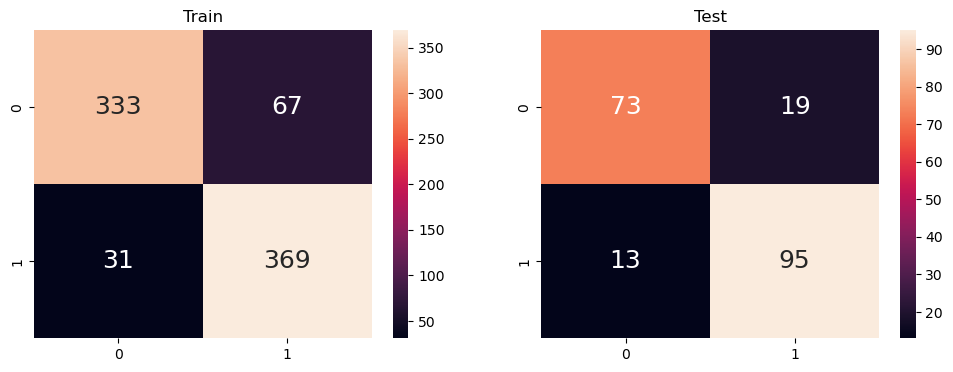

In [35]:
from sklearn.metrics import confusion_matrix

# Define a function to visualise confusion matrix
def viz_cmatrix(y_train, y_train_pred, y_test, y_test_pred):
    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))

    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    axes[0].set_title("Train")
    axes[1].set_title("Test")
    
viz_cmatrix(y_train, y_train_pred, y_test, y_test_pred)

In [36]:
# Define a function to print rate metrics
def printMetrics(true, pred): 
    FP = confusion_matrix(true, pred)[0][1]
    FN = confusion_matrix(true, pred)[1][0]
    TP = confusion_matrix(true, pred)[1][1]
    TN = confusion_matrix(true, pred)[0][0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    TNR = TN / (TN + FP)
    FNR = FN / (FN + TP)
    print("TPR:\t", TPR)
    print("FPR:\t", FPR)
    print("TNR:\t", TNR)
    print("FNR:\t", FNR)
    print()

print("TRAIN SET:")
printMetrics(y_train, y_train_pred)

print("TEST SET:")
printMetrics(y_test, y_test_pred)

TRAIN SET:
TPR:	 0.9225
FPR:	 0.1675
TNR:	 0.8325
FNR:	 0.0775

TEST SET:
TPR:	 0.8796296296296297
FPR:	 0.20652173913043478
TNR:	 0.7934782608695652
FNR:	 0.12037037037037036



## Hyperparameter Tuning: GridSearchCV

As you may have noticed, there was a ConvergenceWarning for our logistic regression model that indicated the lbfgs algorithm failed to converge. We can try to circumvent the ConvergenceWarning by using a different solver, specifying the norm of the penalties, increasing the number of maximum iterations, using the `class_weight` or `multi_class` parameters. Basically, our model can be further optimised with hyperparameter tuning. 

Model parameters are the weights and coefficients that the model's algorithm extracts from the data. On the other hand, hyperparameters are adjustable parameters that can be used to control the model's learning, such as the maximum depth for a decision tree. Hyperparameter optimisation is the tuning of these parameters to optimise the model's performance.

We shall use `GridSearchCV` from `sklearn` library to perform hyperparameter tuning. GridSearch performs an exhaustive searching over combinations of parameters and measures them against a specified score.

In addition, `GridSearchCV` also performs K-Fold cross validation. K-Fold cross validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds, and the model is trained and evaluated k times, using k - 1 folds for training and the last fold for testing each time. In every iteration, a different fold is used as the validation set. Performance metrics from each fold are averaged to estimate the model’s generalization performance. This allows us to train and test our model on the entire given dataset. It also allows us to assess our model's performance more accurately while preventing overfitting of our data.

The number of folds (k) is determined by the `cv` parameter in `GridSearchCV()`. Generally, the choice of k depends on the dataset size and desired bias-variance trade-off. Typical values are k = 5, k = 10 and k = 20. A larger k value can also result in longer computational times (k-folds cross validation has a time complexity of O(kN).

From *An Introduction to Statistical Learning* (2013, p. 184),

> To summarize, there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

We shall choose the default value of k = 5, since a k value of 10 would already take quite a while to run.

Note that some penalties may not work with some solvers. As such, errors will be raised during gridsearch. We will also import the `warnings` library, `ConvergenceWarning` and `FitFailedWarning` from `sklearn.exceptions` to suppress convergence warnings.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning, FitFailedWarning
import warnings

# Create list for solvers and penalties mapped to the parameters' names
param_grid = {"solver" : ["lbfgs", "liblinear", "newton-cg", "sag", "saga"],
              "penalty" : ["l1", "l2", "elasticnet", None],
             "max_iter": [100, 200, 300, 400, 500],
              "class_weight" : [None, "balanced"],
              "multi_class" : ["auto", "ovr", "multinomial"],
             "random_state" : [42]}

# Ignore convergence warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category = ConvergenceWarning)
    warnings.filterwarnings("ignore", category = FitFailedWarning)
    # We want to optimise for accuracy
    clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, scoring = "accuracy", error_score = 0)

    clf.fit(X_train, y_train)

    print("Best estimator:", clf.best_estimator_)
    print()
    print("Best parameters:", clf.best_params_)
    print()
    print("Best score:", clf.best_score_)

Best estimator: LogisticRegression(random_state=42, solver='newton-cg')

Best parameters: {'class_weight': None, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}

Best score: 0.87375


### Optimised Model

It appears the best estimator that GridSearchCV found was `LogisticRegression(random_state = 42, solver = "newton-cg")`. We shall check the accuracy, goodness of fit and metrics again based on these parameters. 

In [38]:
logreg = LogisticRegression(solver = "newton-cg", random_state = 42)
logreg.fit(X_train, y_train)

print("Classes:", logreg.classes_)
print("Intercept:", logreg.intercept_)
print("Coefficients:", [i.round(4) for i in logreg.coef_[0]])

Classes: [0 1]
Intercept: [-0.6192373]
Coefficients: [0.0124, -0.0168, -0.0064, 0.0272, -0.5826, -1.4023, 0.9249, 1.43, 1.3596, 0.3632, 0.2372, -0.2982, -0.7674, 1.0462, 0.3809, -1.1694, 0.701, -1.4438]


### Goodness of Fit of Optimised Model

Let us check its classification accuracy and its confusion matrix. 

In [39]:
# Predict target with model
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", logreg.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", logreg.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8825

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.84



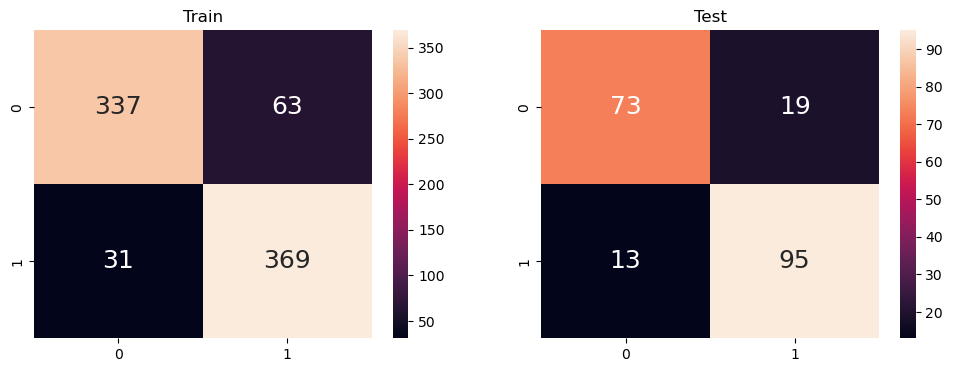

In [40]:
viz_cmatrix(y_train, y_train_pred, y_test, y_test_pred)

In [41]:
# Print the metrics of train and test set

print("TRAIN SET:")
printMetrics(y_train, y_train_pred)

print("TEST SET:")
printMetrics(y_test, y_test_pred)

TRAIN SET:
TPR:	 0.9225
FPR:	 0.1575
TNR:	 0.8425
FNR:	 0.0775

TEST SET:
TPR:	 0.8796296296296297
FPR:	 0.20652173913043478
TNR:	 0.7934782608695652
FNR:	 0.12037037037037036



## Comparison

Although the accuracy and metric scores are almost similar, the optimised model has a slightly higher classification accuracy on the train set (0.8825 to 0.8775).
